### Dataset info
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

The analysis will contemplate the prediction of a certain cancer, indicating whether it is benign (0) or malignant (1).

In [1]:
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install graphviz

In [2]:
from IPython.display import Image

In [3]:
def display_image(img_path, img_width=500, img_height=570):
    return Image(img_path, width=img_width, height=img_height)

### Importing data

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('datasets/breast_cancer_wisconsin_diagnostic_data.csv')

In [6]:
classes = pd.read_csv('datasets/breast_cancer_wisconsin_diagnostic_classes.csv')

In [7]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [8]:
classes.head()

,0
0,0
1,0
2,0
3,0
4,0


### Generating train and test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.25)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426, 1), (143, 1))

### Building the Neural Network

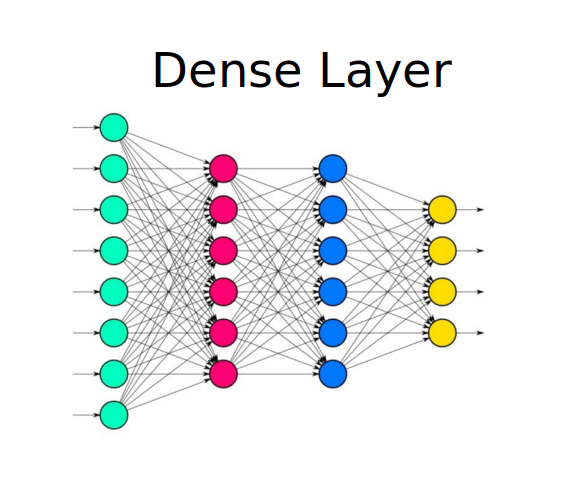

In [12]:
display_image('images/dense_layer.png')

In [13]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense

2023-01-20 00:49:53.728122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 00:49:54.148161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 00:49:54.148179: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 00:49:55.274503: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [14]:
model = Sequential()

2023-01-20 00:49:56.520728: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 00:49:56.521595: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 00:49:56.521744: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-20 00:49:56.521859: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-20 00:49:56.521972: W tensorflow/c

In [15]:
features = data.shape[1]
output = 1
units = math.ceil((features + output) / 2)

In [16]:
units

16

In [17]:
model.add(Dense(units=units, activation='relu', kernel_initializer='random_uniform', input_dim=features))

In [18]:
model.add(Dense(units=output, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

### Training

In [20]:
model.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
43/43 [==============================] - 1s 6ms/step - loss: 3.1179 - binary_accuracy: 0.6831
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 0.7792 - binary_accuracy: 0.7981
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.8810 - binary_accuracy: 0.7840
Epoch 4/100
43/43 [==============================] - 0s 6ms/step - loss: 0.4767 - binary_accuracy: 0.8826
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 0.4505 - binary_accuracy: 0.8850
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4551 - binary_accuracy: 0.8615
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4292 - binary_accuracy: 0.8592
Epoch 8/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3505 - binary_accuracy: 0.8779
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4235 - binary_accuracy: 0.8685
Epoch 10/100
43/43 [==========================

43/43 [==============================] - 0s 2ms/step - loss: 0.2232 - binary_accuracy: 0.9272
Epoch 78/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2992 - binary_accuracy: 0.9225
Epoch 79/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2010 - binary_accuracy: 0.9225
Epoch 80/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2202 - binary_accuracy: 0.9319
Epoch 81/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2425 - binary_accuracy: 0.9249
Epoch 82/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2037 - binary_accuracy: 0.9484
Epoch 83/100
43/43 [==============================] - 0s 2ms/step - loss: 0.2374 - binary_accuracy: 0.9484
Epoch 84/100
43/43 [==============================] - 0s 6ms/step - loss: 0.5697 - binary_accuracy: 0.8732
Epoch 85/100
43/43 [==============================] - 0s 4ms/step - loss: 0.3126 - binary_accuracy: 0.9319
Epoch 86/100
43/43 [==============================

### Generating predictions

In [21]:
predicts = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [22]:
predicts = (predicts > 0.5)

### Validating model accuracy

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
precision = accuracy_score(y_test, predicts)

In [25]:
print(f'The accuracy score was: {precision * 100:.2f}%')

The accuracy score was: 89.51%


In [26]:
matrix = confusion_matrix(y_test, predicts)

In [27]:
print(matrix)

[[49 14]
 [ 1 79]]


In [28]:
model_accuracy = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.7000 - binary_accuracy: 0.8951


In [29]:
print(f'The model accuracy was: {model_accuracy[1] * 100:.2f}%')

The model accuracy was: 89.51%


### Visualizing model

In [30]:
from keras.utils.vis_utils import plot_model

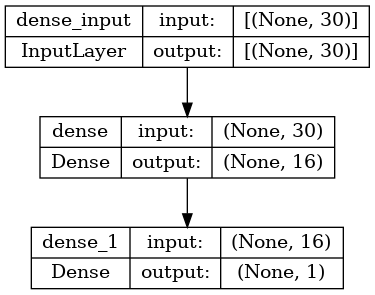

In [31]:
plot_model(model, show_shapes=True, show_layer_names=True)